H vs (E and S )

Data brute

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6034 - loss: 73.3429 - val_accuracy: 0.6111 - val_loss: 60.5693
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8045 - loss: 17.8634 - val_accuracy: 0.6333 - val_loss: 37.1293
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8669 - loss: 7.6308 - val_accuracy: 0.6111 - val_loss: 52.4364
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9217 - loss: 2.7937 - val_accuracy: 0.6667 - val_loss: 24.2425
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9449 - loss: 2.8310 - val_accuracy: 0.6333 - val_loss: 35.8668
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9167 - loss: 13.8381 - val_accuracy: 0.6333 - val_loss: 57.7958
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9084 - loss: 12.6593 - val_accuracy: 0.6667 - val_loss: 25.6525
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9449 - loss: 4.7912 - val_accuracy: 0.7111 - val_loss: 18.1172

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Accuracy:  0.7
Recall:  0.6246753246753247
Precision:  0.7564102564102564
Confusion Matrix: 
 [[10 25]
 [ 2 53]]


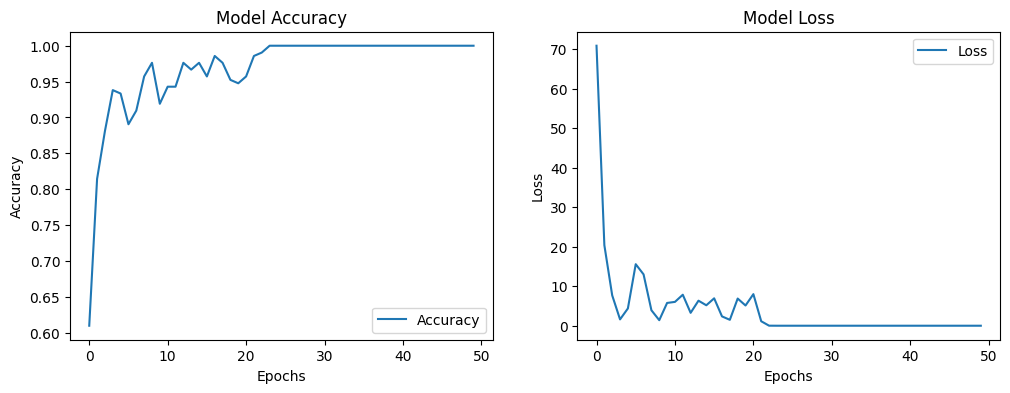

In [5]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z vs (S and N as same label))
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)

# Step 1: Load data from the directories (Z vs S and N treated as the same label)
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Healthy (Z)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizeur (S)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)

# Step 2: Concatenate data and labels from the three classes (Z vs S and N as same label)
if data_Z.size > 0 and data_S.size > 0 and data_N.size > 0:
    data_all = np.concatenate((data_Z, data_S, data_N), axis=0)
    labels_all = np.concatenate((labels_Z, labels_S, labels_N), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: One-hot encode the labels for Softmax activation (2 classes: Z vs S and N as same label)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Healthy and Non-Healthy)

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 5: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Healthy and Non-Healthy)
    ])

    # Compile the model with categorical crossentropy loss (for multi-class classification)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 6: Train the model and show training progress
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Step 7: Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 8: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 9: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)




else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


    # Step 10: Plot Training History
import matplotlib.pyplot as plt

# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


with standerscaler

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.6529 - loss: 0.6354 - val_accuracy: 0.8222 - val_loss: 0.4466
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - accuracy: 0.9126 - loss: 0.2642 - val_accuracy: 0.6778 - val_loss: 0.8352
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9153 - loss: 0.3107 - val_accuracy: 0.7444 - val_loss: 0.7330
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.9682 - loss: 0.0909 - val_accuracy: 0.7444 - val_loss: 0.6401
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9704 - loss: 0.0877 - val_accuracy: 0.8111 - val_loss: 0.5674
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.9895 - loss: 0.0466 - val_accuracy: 0.7889 - val_loss: 0.5765
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.9970 - loss: 0.0169 - val_accuracy: 0.7889 - val_loss: 0.7939
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.7778 - val_loss: 1.1118
Epoch 9/50

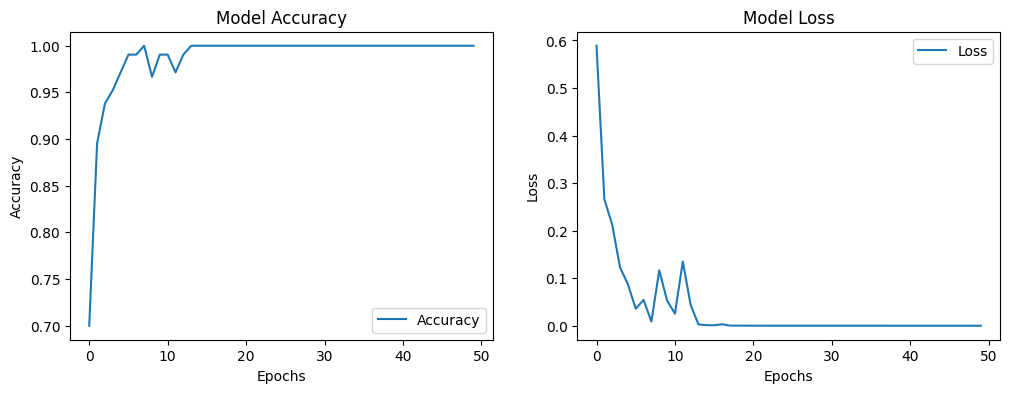

In [6]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z vs (S and N as same label))
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)

# Step 1: Load data from the directories (Z vs S and N treated as the same label)
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Healthy (Z)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizeur (S)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)

# Step 2: Concatenate data and labels from the three classes (Z vs S and N as same label)
if data_Z.size > 0 and data_S.size > 0 and data_N.size > 0:
    data_all = np.concatenate((data_Z, data_S, data_N), axis=0)
    labels_all = np.concatenate((labels_Z, labels_S, labels_N), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: One-hot encode the labels for Softmax activation (2 classes: Z vs S and N as same label)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Healthy and Non-Healthy)

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 5: Standardize the data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 6: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Healthy and Non-Healthy)
    ])

    # Compile the model with categorical crossentropy loss (for multi-class classification)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 7: Train the model and show training progress
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Step 8: Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 9: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 10: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)

    # Step 11: Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


with only optmizer


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.6428 - loss: 27.4259 - val_accuracy: 0.6000 - val_loss: 38.9423
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8869 - loss: 9.9994 - val_accuracy: 0.6667 - val_loss: 32.7286
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8818 - loss: 3.3914 - val_accuracy: 0.6111 - val_loss: 46.7957
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.9262 - loss: 3.6245 - val_accuracy: 0.5889 - val_loss: 51.9568
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.9786 - loss: 1.6429 - val_accuracy: 0.6000 - val_loss: 63.5445
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9768 - loss: 2.5494 - val_accuracy: 0.6333 - val_loss: 58.5531
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9539 - loss: 2.5405 - val_accuracy: 0.6444 - val_loss: 32.4076
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9249 - loss: 5.5064 - val_accuracy: 0.6778 - val_loss: 50.1442
Ep

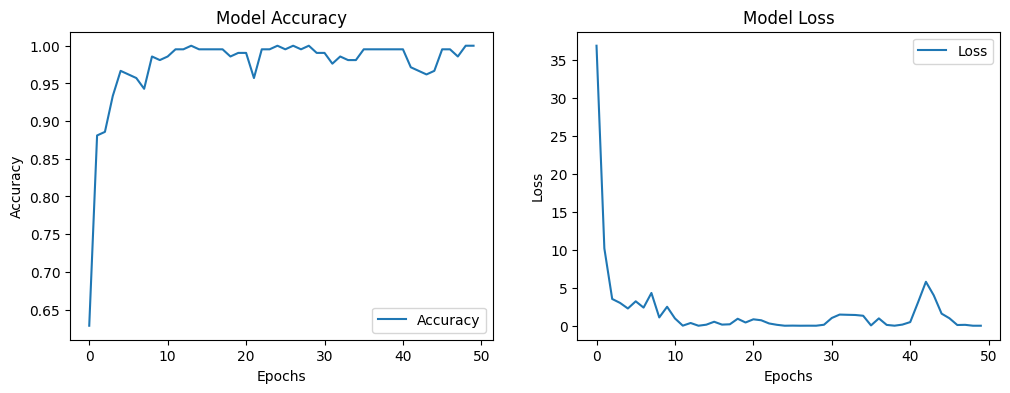

In [7]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z vs (S and N) treated as the same label)
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)

# Step 1: Load data from the directories (Z vs S and N treated as the same label)
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Healthy (Z)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizeur (S)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)

# Step 2: Concatenate data and labels from the three classes (Z vs S and N as same label)
if data_Z.size > 0 and data_S.size > 0 and data_N.size > 0:
    data_all = np.concatenate((data_Z, data_S, data_N), axis=0)
    labels_all = np.concatenate((labels_Z, labels_S, labels_N), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: One-hot encode the labels for Softmax activation (2 classes: Z vs S and N as same label)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Healthy and Non-Healthy)

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 5: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Healthy and Non-Healthy)
    ])

    # Step 6: Compile the model with Adam optimizer
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 7: Train the model and show training progress
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Step 8: Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 9: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 10: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)

    # Step 11: Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


both Adam optimizer and StandardScaler

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6040 - loss: 0.7179 - val_accuracy: 0.6111 - val_loss: 0.5120
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9001 - loss: 0.2567 - val_accuracy: 0.7778 - val_loss: 0.3821
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9741 - loss: 0.1192 - val_accuracy: 0.8222 - val_loss: 0.3733
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9781 - loss: 0.1079 - val_accuracy: 0.7222 - val_loss: 0.8457
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9820 - loss: 0.0932 - val_accuracy: 0.7778 - val_loss: 0.7112
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9866 - loss: 0.0381 - val_accuracy: 0.7444 - val_loss: 0.7964
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9902 - loss: 0.0288 - val_accuracy: 0.8333 - val_loss: 0.7774
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9970 - loss: 0.0077 - val_accuracy: 0.7667 - val_loss: 0.9641


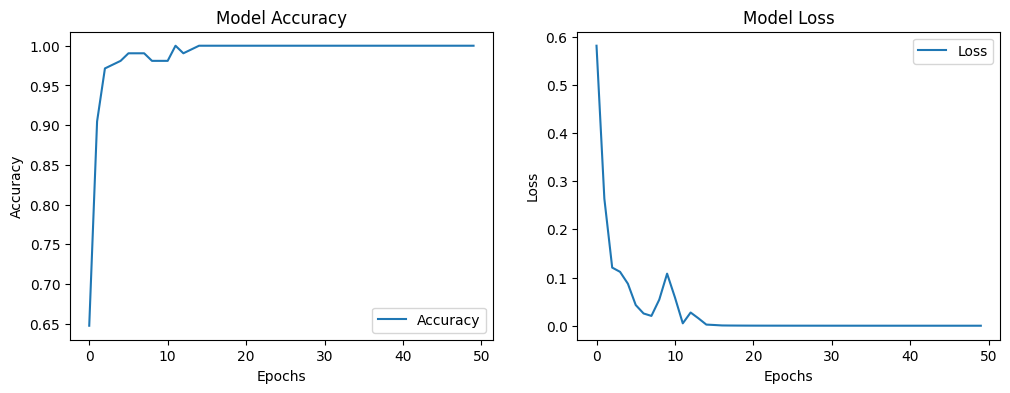

In [8]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt

# Define a function to load the data from the directories
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory, including .txt and .TXT files
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Case-insensitive check for .txt and .TXT files

    # If no files found, return empty arrays
    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)

        try:
            file_data = np.loadtxt(file_path)
            if file_data.ndim == 1:  # If 1D data, reshape to (n_samples, 1)
                file_data = file_data.reshape(-1, 1)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    # Convert to numpy arrays
    data = np.array(data, dtype=object)
    labels = np.array(labels)

    return data, labels

# Paths to your datasets (Z vs (S and N) treated as the same label)
path_Z = '/content/drive/My Drive/PFA2_DataSet/DataSet/Healthy/Z'  # Healthy (Z)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)
path_N = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Epileptic (N)

# Step 1: Load data from the directories (Z vs S and N treated as the same label)
data_Z, labels_Z = load_data_from_directory(path_Z, label=0)  # Healthy (Z)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizeur (S)
data_N, labels_N = load_data_from_directory(path_N, label=1)  # Epileptic (N)

# Step 2: Concatenate data and labels from the three classes (Z vs S and N as same label)
if data_Z.size > 0 and data_S.size > 0 and data_N.size > 0:
    data_all = np.concatenate((data_Z, data_S, data_N), axis=0)
    labels_all = np.concatenate((labels_Z, labels_S, labels_N), axis=0)

    # Flatten data arrays into 2D arrays if necessary
    data_all = [d.flatten() for d in data_all]  # Flatten each sample
    data_all = np.array(data_all)

    # Ensure the data is of type float32
    data_all = data_all.astype(np.float32)

    # Step 3: One-hot encode the labels for Softmax activation (2 classes: Z vs S and N as same label)
    labels_all = to_categorical(labels_all, num_classes=2)  # One-hot encoding for 2 classes (Healthy and Non-Healthy)

    # Step 4: Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Step 5: Apply StandardScaler to the data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Step 6: Define the ANN model with Softmax in the output layer (2 classes)
    model = Sequential([
        Dense(512, input_dim=X_train.shape[1], activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')  # Output layer for 2 classes (Healthy and Non-Healthy)
    ])

    # Step 7: Compile the model with Adam optimizer
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Step 8: Train the model and show training progress
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Step 9: Evaluate the model on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Get the index of the class with the highest probability

    # Step 10: Calculate evaluation metrics
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_classes)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    precision = precision_score(np.argmax(y_test, axis=1), y_pred_classes, average='macro')
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_classes)

    # Step 11: Print evaluation metrics
    print("Accuracy: ", accuracy)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Confusion Matrix: \n", conf_matrix)

    # Step 12: Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")
